# Importing libraries 

In [1]:
#Import libraries 

import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

# Importing Data 

In [2]:
#create a path 
path = r'/Users/scarlettgrim/Python Projects/01-2024 Instacart Basket Analysis'

In [3]:
#importing ords_prods_merged_flagged.pkl
df_ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_all.pkl'))

# Creating a bar chart 

<Axes: xlabel='orders_day_of_week'>

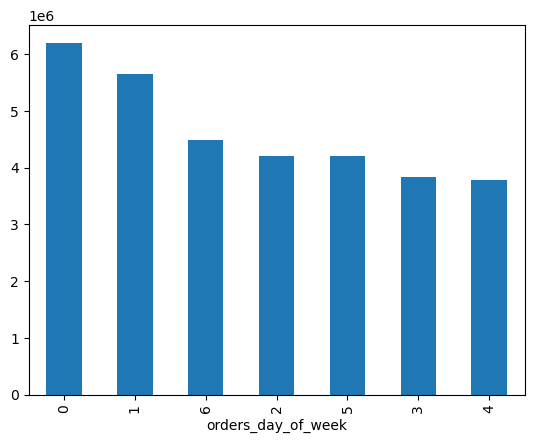

In [16]:
# bar chart for frquency of orders_day_of_week
df_ords_prods['orders_day_of_week'].value_counts().plot.bar()

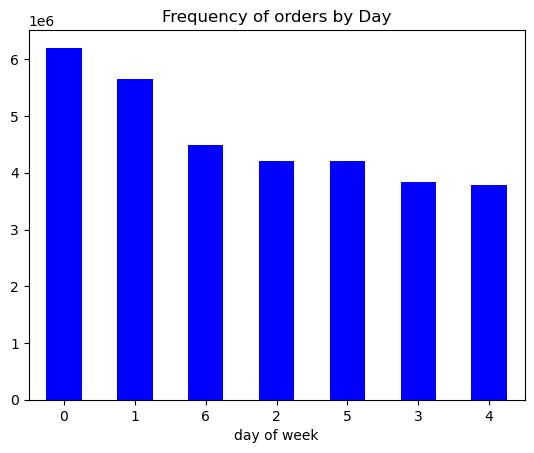

In [24]:
# bar chart with color 
df_ords_prods['orders_day_of_week'].value_counts().plot.bar(color = ['blue'])
plt.xlabel('day of week')
plt.title('Frequency of orders by Day')
plt.xticks(rotation=0)
plt.show()

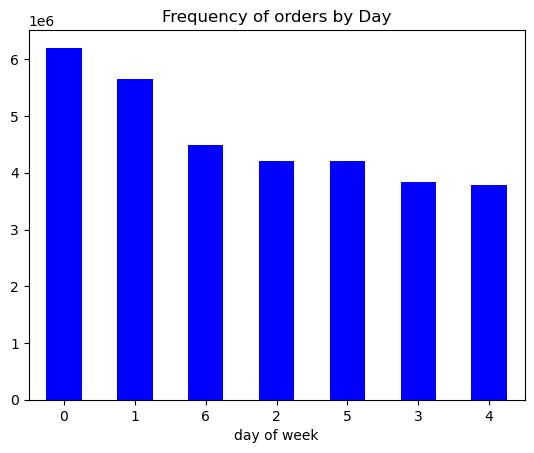

In [25]:
#create an object to save the bar chart 
bar = df_ords_prods['orders_day_of_week'].value_counts().plot.bar(color = ['blue'])
plt.xlabel('day of week')
plt.title('Frequency of orders by Day')
plt.xticks(rotation=0)
plt.show()

In [26]:
# saving bar_chart
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'prices_by_day_dow.png'))

# Histogram 

<Axes: ylabel='Frequency'>

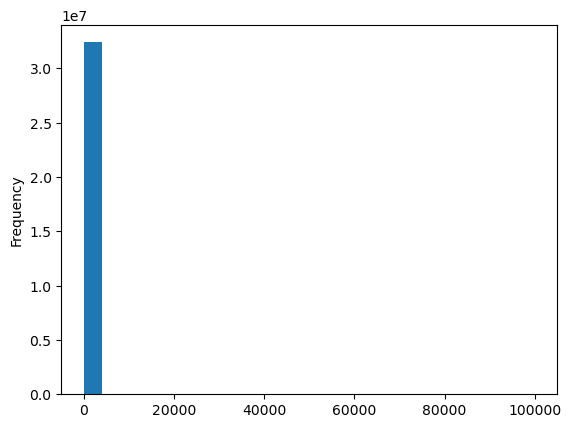

In [4]:
#histogram for prices 
df_ords_prods['prices'].plot.hist(bins = 25) 

In [5]:
#looking for issue with data 
df_ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
df_ords_prods['prices'].agg(['mean', 'median', 'min', 'max'])

mean         11.980226
median        7.400000
min           1.000000
max       99999.000000
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

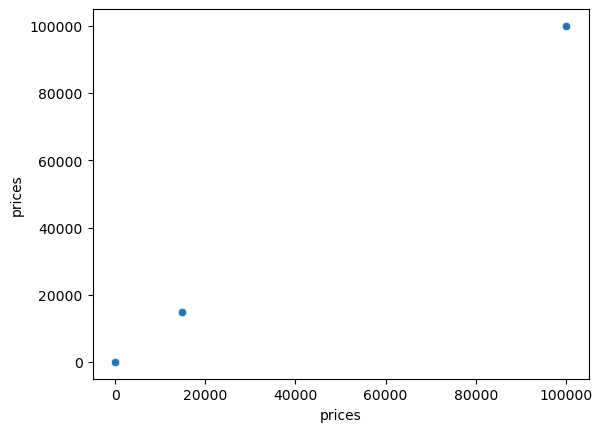

In [7]:
#scatterplot to look at outliers 
sns.scatterplot(x = 'prices', y = 'prices', 
                data = df_ords_prods)

In [8]:
#checking for outlier data 
df_ords_prods.loc[df_ords_prods['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,product_id,add_to_cart_order,reordered,product_name,...,Frequency_flag,first_name,last_name,Gender,state,age,number_of_dependents,marital_status,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Reglar customer,Jerry,Allen,Male,Louisiana,59,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Reglar customer,Unknown,Gould,Male,Rhode Island,58,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Reglar customer,Diana,Hansen,Female,Rhode Island,35,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-Frequent Customer,Johnny,Colon,Male,Rhode Island,78,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,2,married,398880,both


In [9]:
#removing outliers 
df_ords_prods.loc[df_ords_prods['prices'] > 100, 'prices'] = np.nan

In [10]:
#checking the outliers were removed 
df_ords_prods['prices'].max()

25.0

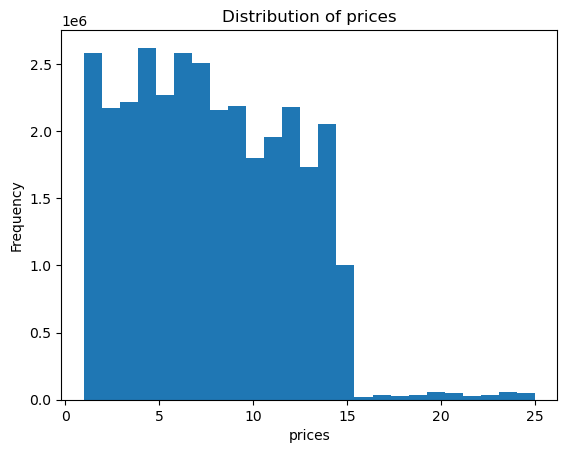

In [51]:
#trying histogram again 
hist = df_ords_prods['prices'].plot.hist(bins = 25)
plt.xlabel('prices')
plt.title('Distribution of prices')
plt.xticks(rotation=0)
plt.show()

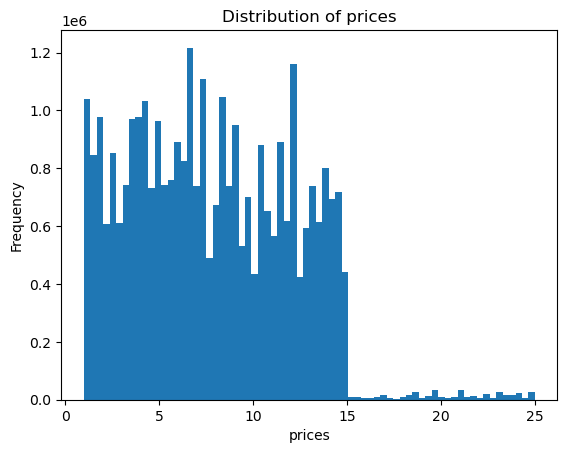

In [52]:
#histogram with more bins 
hist_2 = df_ords_prods['prices'].plot.hist(bins = 70)
plt.xlabel('prices')
plt.title('Distribution of prices')
plt.xticks(rotation=0)
plt.show()


In [53]:
# saving hist_2
hist_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_prices_all_data.png'))

# line graph & creating a subset 

In [27]:
np.random.seed(4)

In [28]:
#create a list holding true/false values to test np.random.rant() <= 0.7 

dev = np.random.rand(len(df_ords_prods)) <= 0.7 

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [31]:
# store 70% of the sample in the dataframe big 

big = df_ords_prods[dev]

In [32]:
# store 30% of the smaple in the dataframe small 

small = df_ords_prods[~dev]

In [33]:
len(df_ords_prods)

32404859

In [34]:
len(big) + len(small)

32404859

In [35]:
#creating a dataframe df_2 with only the necessary columns from small subset 
df_2 = small[['orders_day_of_week', 'prices']]

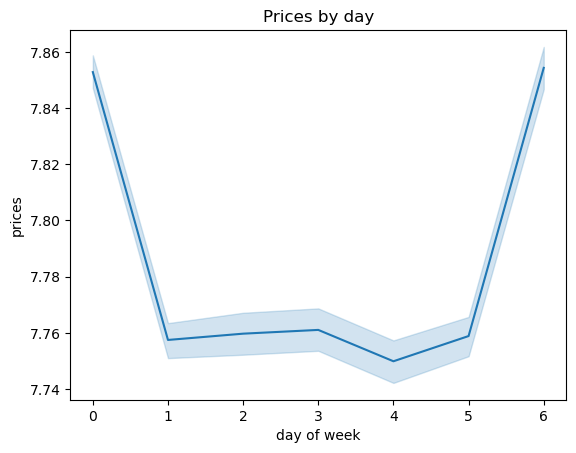

In [36]:
#finally creating this chart for the 30% sample 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
plt.xlabel('day of week')
plt.title('Prices by day')
plt.xticks(rotation=0)
plt.show()

In [37]:
#exporting the line graph 

line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_prices_day_of_week_all.png'))

# Order hour of the day historgram 

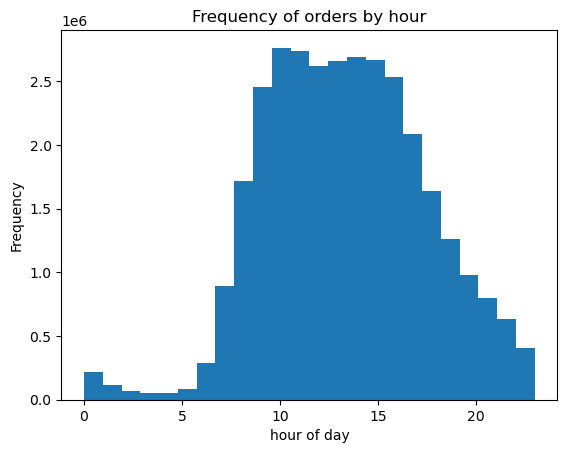

In [18]:
#histogram with more bins 
hist_order_hour_of_day = df_ords_prods['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel('hour of day')
plt.title('Frequency of orders by hour')
plt.xticks(rotation=0)
plt.show()

In [19]:
# saving hist_order_hour_of_day
hist_order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [44]:
#This histogram demonstrates that the least busy times are from 1am - 6am. 
#The peak hours for orders are from approximately 9 am to 6pm and after 5pm orders start 
#To decline. 

# Create a bar chart from loyalty flag column 

<Axes: xlabel='loyalty_flag'>

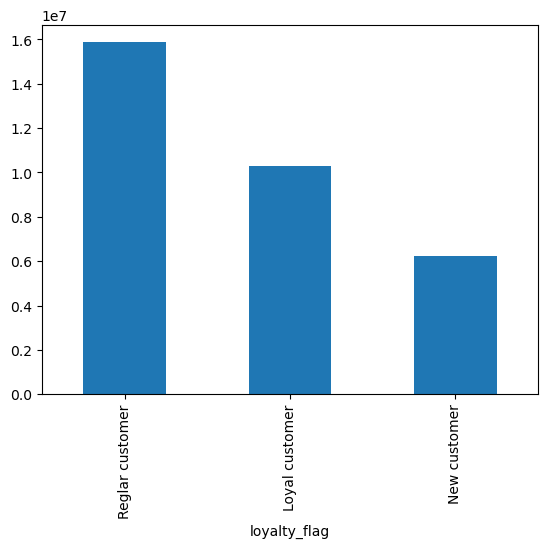

In [45]:
# bar chart for frquency of orders_day_of_week
df_ords_prods['loyalty_flag'].value_counts().plot.bar()

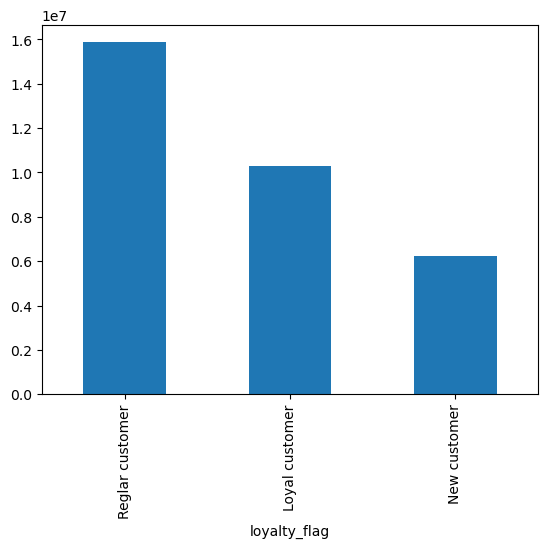

In [56]:
#creating an object to save the bar chart 
bar_2 = df_ords_prods['loyalty_flag'].value_counts().plot.bar()

In [57]:
# saving bar_chart
bar_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

# Is there a differnece in expendetures by hour of day 

In [38]:
#create the seed
np.random.seed(4)

In [39]:
#create a list holding true/false values to test the np.random.rand () <= 0.7 
dev = np.random.rand(len(df_ords_prods)) <= 0.7 

In [40]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [41]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [42]:
#storing 70% of the sample in the big data frame 

big = df_ords_prods[dev]

In [43]:
#storing 30% of the smaple in the dataframe big 

small = df_ords_prods[~dev]

In [44]:
len(df_ords_prods)

32404859

In [45]:
len(big) + len(small)

32404859

In [46]:
#creating a dataframe df_3 with only necessary columns from the small subset

df_3 = small[['order_hour_of_day', 'prices']]

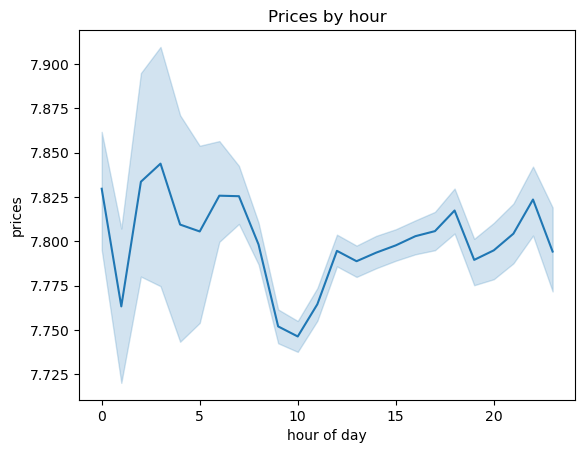

In [48]:
#finally creating this chart for the 30% sample 
line_hour_of_day_ordered = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('hour of day')
plt.title('Prices by hour')
plt.show()

In [49]:
#exporting line_hour_of_day

line_hour_of_day_ordered.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_hour_of_day_ordered.png'))

# Checking connection between age and number of dependents 

In [89]:
#create the seed 

np.random.seed(4) 

In [90]:
#create a listholding true/false values to test the np.random.rand() <= 0.7

dev = np.random.rand(len(df_ords_prods)) <= 0.7 

In [91]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [92]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [93]:
#storing 70% of the sample in the big data frame 

big = df_ords_prods[dev]

In [94]:
#storing 30% of the smaple in the dataframe big 

small = df_ords_prods[~dev]

In [95]:
len(df_ords_prods)

32404859

In [96]:
#creating a dataframe df_3 with only necessary columns from the small subset

df_4 = small[['number_of_dependents', 'age']]

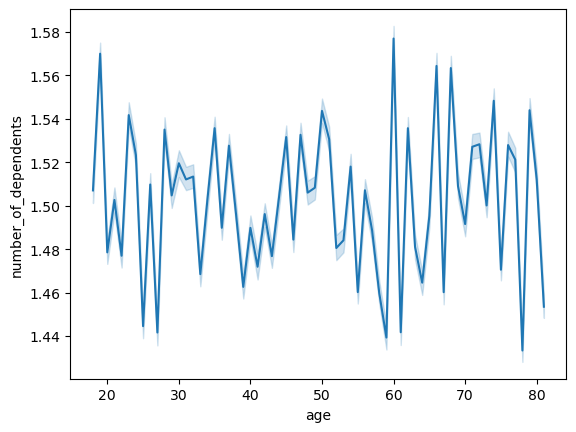

In [99]:
#create line chart for 30% sample 

line_number_of_dependents = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependents')

In [100]:
#exporting line_number_of_dependents

line_number_of_dependents.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_number_of_dependents.png'))

In [101]:
#The line chart does not show a correlation between age and number of dependents 

# Age and spending power via scatterplot 

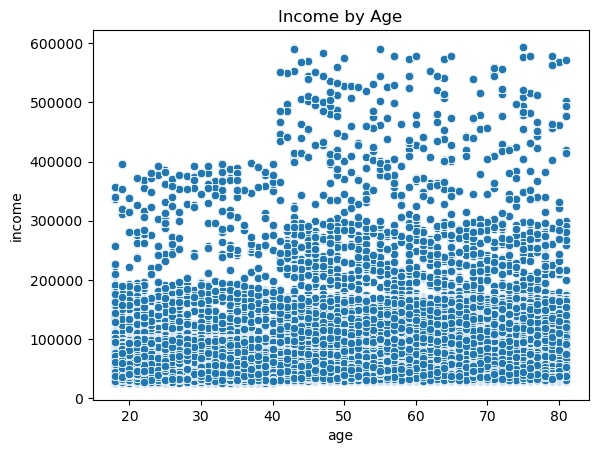

In [68]:
#creating a scatterplot to see if there is a connection between age and income 

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods)
plt.title('Income by Age')
plt.xticks(rotation=0)
plt.show()

In [69]:
#exporting the scatterplot 

scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [105]:
#The scatterplot shows the shows that the highest density of income across all ages is between $0 and $200,000. The next highest income bracket is from $200k to $300k for the 40+ age group. It seems that age isn't a factor until you exceed an income of $200k.Between $200k and $400k we see income across alla ges with a higher density in the 40+ populationa. Over a 400k income seems to be the least dense and only existing in the 40+ population.   

In [55]:
product_range_percent = (df_ords_prods['price_range_loc'].value_counts(normalize=True) * 100).sort_index()

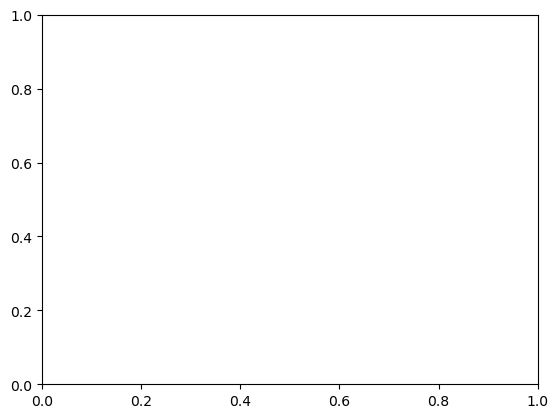

In [56]:
fig, ax = plt.subplots()

In [57]:
product_range_pie = ax.pie(product_range_percent, labels=product_range_percent.index, autopct='%1.1f%%',  colors=['mediumpurple', 'peachpuff', 'palegreen', 'lightskyblue', 'pink'])
ax.set_title('Product Range by Percent')

Text(0.5, 1.0, 'Product Range by Percent')

In [58]:
#save age_group_pie as a png 

fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'product_range_percent.png'))

In [59]:
loyalty_percent = (df_ords_prods['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

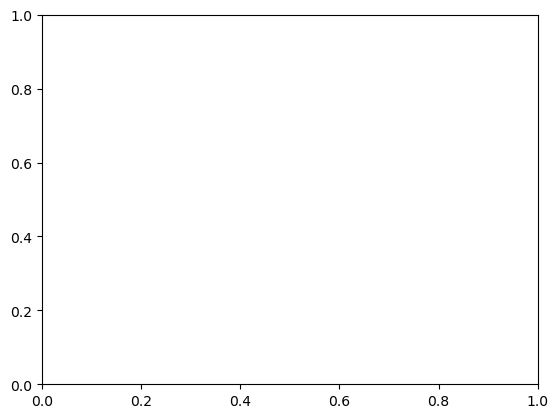

In [60]:
fig, ax = plt.subplots()

In [61]:
loyalty_percent_pie = ax.pie(loyalty_percent, labels=loyalty_percent.index, autopct='%1.1f%%',  colors=['mediumpurple', 'peachpuff', 'palegreen', 'lightskyblue', 'pink'])
ax.set_title('Loyalty by Percent')

Text(0.5, 1.0, 'Loyalty by Percent')

In [62]:
#save age_group_pie as a png 

fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_percent.png'))

In [63]:
marital_percent = (df_ords_prods['marital_status'].value_counts(normalize=True) * 100).sort_index()

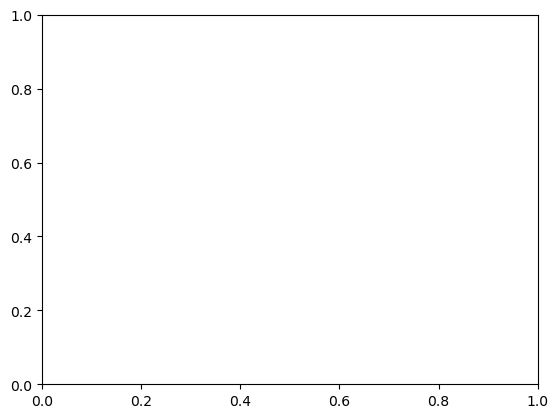

In [64]:
fig, ax = plt.subplots()

In [66]:
marital_percent_pie = ax.pie(marital_percent, labels=marital_percent.index, autopct='%1.1f%%',  colors=['mediumpurple', 'peachpuff', 'palegreen', 'lightskyblue', 'pink'])
ax.set_title('Marital Status by Percent of Orders')

Text(0.5, 1.0, 'Marital Status by Percent of Orders')

In [67]:
#save age_group_pie as a png 

fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'marital_percent.png'))